# PASSNYC: Data Science for Good Challenge

- "PASSNYC and its partners provide outreach services that improve the chances of students taking the SHSAT and receiving placements in these specialized high schools."

- Proxies that have been good indicators of these types of schools include data on English Language Learners, Students with Disabilities, Students on Free/Reduced Lunch, and Students with Temporary Housing.

- The best solutions will enable PASSNYC to identify the schools where minority and underserved students stand to gain the most from services like after school programs, test preparation, mentoring, or resources for parents.

## Goal

- Help PASSNYC determine which schools need their services the most.
- To quantifying the potential for outreach at a given school. 



### There are two files:

1. '2016 School Explorer.csv'

2. 'D5 SHSAT Registrations and Testers.csv'


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.plotly as py

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

import re
sns.set_style("white")


In [2]:
df1 = pd.read_csv('2016 School Explorer.csv')
df2 = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
pd.set_option('display.max_columns', None)  


**These are the first 40 features. The other features contains information about Grade 3 - Grade 8 and will be looked at separately**


In [3]:
for i in df1.columns[:41]:
    print(i,type(df1[i][0]))

Adjusted Grade <class 'float'>
New? <class 'float'>
Other Location Code in LCGMS <class 'float'>
School Name <class 'str'>
SED Code <class 'numpy.int64'>
Location Code <class 'str'>
District <class 'numpy.int64'>
Latitude <class 'numpy.float64'>
Longitude <class 'numpy.float64'>
Address (Full) <class 'str'>
City <class 'str'>
Zip <class 'numpy.int64'>
Grades <class 'str'>
Grade Low <class 'str'>
Grade High <class 'str'>
Community School? <class 'str'>
Economic Need Index <class 'numpy.float64'>
School Income Estimate <class 'str'>
Percent ELL <class 'str'>
Percent Asian <class 'str'>
Percent Black <class 'str'>
Percent Hispanic <class 'str'>
Percent Black / Hispanic <class 'str'>
Percent White <class 'str'>
Student Attendance Rate <class 'str'>
Percent of Students Chronically Absent <class 'str'>
Rigorous Instruction % <class 'str'>
Rigorous Instruction Rating <class 'str'>
Collaborative Teachers % <class 'str'>
Collaborative Teachers Rating <class 'str'>
Supportive Environment % <clas

In [4]:
df1.shape  
# 1272 rows by 161 columns

(1272, 161)

In [5]:
df1.head(2)

Adjusted Grade New? Other Location Code in LCGMS                School Name  \
0            NaN  NaN                          NaN  P.S. 015 ROBERTO CLEMENTE   
1            NaN  NaN                          NaN        P.S. 019 ASHER LEVY   

       SED Code Location Code  District   Latitude  Longitude  \
0  310100010015        01M015         1  40.721834 -73.978766   
1  310100010019        01M019         1  40.729892 -73.984231   

                    Address (Full)      City    Zip                Grades  \
0  333 E 4TH ST NEW YORK, NY 10009  NEW YORK  10009  PK,0K,01,02,03,04,05   
1   185 1ST AVE NEW YORK, NY 10003  NEW YORK  10003  PK,0K,01,02,03,04,05   

  Grade Low Grade High Community School?  Economic Need Index  \
0        PK         05               Yes                0.919   
1        PK         05                No                0.641   

  School Income Estimate Percent ELL Percent Asian Percent Black  \
0            $31,141.72           9%            5%           32%   
1            $56,462.88           5%           10%           20%   

  Percent Hispanic Percent Black / Hispanic Percent White  \
0              60%                      92%            1%   
1              63%                      83%            6%   

  Student Attendance Rate Percent of Students Chronically Absent  \
0                     94%                                    18%   
1                     92%                                    30%   

  Rigorous Instruction % Rigorous Instruction Rating Collaborative Teachers %  \
0                    89%              Meeting Target                      94%   
1                    96%                         NaN                      96%   

  Collaborative Teachers Rating Supportive Environment %  \
0                Meeting Target                      86%   
1                           NaN                      97%   

  Supportive Environment Rating Effective School Leadership %  \
0              Exceeding Target                           91%   
1                           NaN                           90%   

  Effective School Leadership Rating Strong Family-Community Ties %  \
0                   Exceeding Target                            85%   
1                   Exceeding Target                            86%   

  Strong Family-Community Ties Rating Trust %      Trust Rating  \
0                      Meeting Target     94%  Exceeding Target   
1                      Meeting Target     94%    Meeting Target   

  Student Achievement Rating  Average ELA Proficiency  \
0         Approaching Target                     2.14   
1           Exceeding Target                     2.63   

   Average Math Proficiency  Grade 3 ELA - All Students Tested  \
0                      2.17                                 20   
1                      2.98                                 33   

   Grade 3 ELA 4s - All Students  \
0                              0   
1                              2   

   Grade 3 ELA 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   

   Grade 3 ELA 4s - Black or African American  \
0                                           0   
1                                           1   

   Grade 3 ELA 4s - Hispanic or Latino  \
0                                    0   
1                                    1   

   Grade 3 ELA 4s - Asian or Pacific Islander  Grade 3 ELA 4s - White  \
0                                           0                       0   
1                                           0                       0   

   Grade 3 ELA 4s - Multiracial  Grade 3 ELA 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   

   Grade 3 ELA 4s - Economically Disadvantaged  \
0                                            0   
1                 

# Check for Null Values

In [6]:
print(df1['Adjusted Grade'].isnull().value_counts()) # 1270 null values 
print(df1['New?'].isnull().value_counts()) #1245 null vaues
print(df1['Other Location Code in LCGMS'].isnull().value_counts()) #1271 Null values

True     1270
False       2
Name: Adjusted Grade, dtype: int64
True     1245
False      27
Name: New?, dtype: int64
True     1271
False       1
Name: Other Location Code in LCGMS, dtype: int64


In [7]:
df1.drop(['Adjusted Grade','New?','Other Location Code in LCGMS' ],axis=1, inplace=True)

In [8]:
df1.tail(2)

School Name      SED Code Location Code  \
1270  BRONX CHARTER SCHOOL FOR BETTER LEARNING  321100860855        84X718   
1271         BRONX CHARTER SCHOOL FOR THE ARTS  320800860846        84X730   

      District   Latitude  Longitude  \
1270        11  40.888739 -73.847787   
1271         8  40.821798 -73.886463   

                                 Address (Full)   City    Zip  \
1270  3740 BAYCHESTER AVE ANNEX BRONX, NY 10466  BRONX  10466   
1271         950 LONGFELLOW AVE BRONX, NY 10474  BRONX  10474   

                    Grades Grade Low Grade High Community School?  \
1270     0K,01,02,03,04,05        0K         05                No   
1271  0K,01,02,03,04,05,06        0K         06                No   

      Economic Need Index School Income Estimate Percent ELL Percent Asian  \
1270                0.544            $47,192.42           2%            2%   
1271                0.840            $29,096.71          15%            1%   

     Percent Black Percent Hispanic Percent Black / Hispanic Percent White  \
1270           86%               9%                      95%            1%   
1271           28%              67%                      96%            2%   

     Student Attendance Rate Percent of Students Chronically Absent  \
1270                     95%                                    12%   
1271                     93%                                    22%   

     Rigorous Instruction % Rigorous Instruction Rating  \
1270                    93%              Meeting Target   
1271                    87%          Approaching Target   

     Collaborative Teachers % Collaborative Teachers Rating  \
1270                      91%                Meeting Target   
1271                      84%                Meeting Target   

     Supportive Environment % Supportive Environment Rating  \
1270                      96%              Exceeding Target   
1271                      84%            Approaching Target   

     Effective School Leadership % Effective School Leadership Rating  \
1270                           89%                   Exceeding Target   
1271                           77%                     Meeting Target   

     Strong Family-Community Ties % Strong Family-Community Ties Rating  \
1270                            91%                    Exceeding Target   
1271                            85%                      Meeting Target   

     Trust %        Trust Rating Student Achievement Rating  \
1270     95%    Exceeding Target             Meeting Target   
1271     84%  Approaching Target           Exceeding Target   

      Average ELA Proficiency  Average Math Proficiency  \
1270                     2.60                      3.29   
1271                     2.74                      3.19   

      Grade 3 ELA - All Students Tested  Grade 3 ELA 4s - All Students  \
1270                                 72                              2   
1271                                 50                              6   

      Grade 3 ELA 4s - American Indian or Alaska Native  \
1270                                                  0   
1271                                                  0   

      Grade 3 ELA 4s - Black or African American  \
1270                                           2   
1271                                           1   

      Grade 3 ELA 4s - Hispanic or Latino  \
1270                                    0   
1271                                    5   

      Grade 3 ELA 4s - Asian or Pacific Islander  Grade 3 ELA 4s - White  \
1270                                           0                       0   
1271                                           0                       0   

      Grade 3 ELA 4s - Multiracial  \
1270                             0   
1271                             0   

      Grade 3 ELA 4s - Limited English Proficient  \
1270                                            0   
1271                                            0   

      Grade 3 ELA 4s 

## Distribution of schools

**Let's check the distribution of District and School Name. Seperate the School Name by I.S., M.S. P.S, Charter, J.H.S. and Others.**

In [9]:
def school(x):
    if re.search(r'P.S.', x):
        return 'P.S.'
    elif re.search(r'I.S.', x):
        return 'I.S.'
    elif re.search(r'M.S.', x):
        return 'M.S.'
    elif re.search(r'CHARTER', x):
        return 'CHARTER'
    elif re.search(r'J.H.S.', x):
        return 'J.H.S.'
    else:
        return 'OTHER'



In [10]:
df1['School Prefix'] = df1['School Name'].apply(lambda x: school(x.upper()))
df1.head(2)

School Name      SED Code Location Code  District   Latitude  \
0  P.S. 015 ROBERTO CLEMENTE  310100010015        01M015         1  40.721834   
1        P.S. 019 ASHER LEVY  310100010019        01M019         1  40.729892   

   Longitude                   Address (Full)      City    Zip  \
0 -73.978766  333 E 4TH ST NEW YORK, NY 10009  NEW YORK  10009   
1 -73.984231   185 1ST AVE NEW YORK, NY 10003  NEW YORK  10003   

                 Grades Grade Low Grade High Community School?  \
0  PK,0K,01,02,03,04,05        PK         05               Yes   
1  PK,0K,01,02,03,04,05        PK         05                No   

   Economic Need Index School Income Estimate Percent ELL Percent Asian  \
0                0.919            $31,141.72           9%            5%   
1                0.641            $56,462.88           5%           10%   

  Percent Black Percent Hispanic Percent Black / Hispanic Percent White  \
0           32%              60%                      92%            1%   
1           20%              63%                      83%            6%   

  Student Attendance Rate Percent of Students Chronically Absent  \
0                     94%                                    18%   
1                     92%                                    30%   

  Rigorous Instruction % Rigorous Instruction Rating Collaborative Teachers %  \
0                    89%              Meeting Target                      94%   
1                    96%                         NaN                      96%   

  Collaborative Teachers Rating Supportive Environment %  \
0                Meeting Target                      86%   
1                           NaN                      97%   

  Supportive Environment Rating Effective School Leadership %  \
0              Exceeding Target                           91%   
1                           NaN                           90%   

  Effective School Leadership Rating Strong Family-Community Ties %  \
0                   Exceeding Target                            85%   
1                   Exceeding Target                            86%   

  Strong Family-Community Ties Rating Trust %      Trust Rating  \
0                      Meeting Target     94%  Exceeding Target   
1                      Meeting Target     94%    Meeting Target   

  Student Achievement Rating  Average ELA Proficiency  \
0         Approaching Target                     2.14   
1           Exceeding Target                     2.63   

   Average Math Proficiency  Grade 3 ELA - All Students Tested  \
0                      2.17                                 20   
1                      2.98                                 33   

   Grade 3 ELA 4s - All Students  \
0                              0   
1                              2   

   Grade 3 ELA 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   

   Grade 3 ELA 4s - Black or African American  \
0                                           0   
1                                           1   

   Grade 3 ELA 4s - Hispanic or Latino  \
0                                    0   
1                                    1   

   Grade 3 ELA 4s - Asian or Pacific Islander  Grade 3 ELA 4s - White  \
0                                           0                       0   
1                                           0                       0   

   Grade 3 ELA 4s - Multiracial  Grade 3 ELA 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   

   Grade 3 ELA 4s - Economically Disadvantaged  \
0                                            0   
1                                            0   

   Grade 3 Math - All Students tested  Grade 3 Math 4s - All Students  \
0                                  21                               0   

In [11]:
sns.set_style("whitegrid")

df1['School Prefix'].value_counts().iplot(kind='bar')
plt.show()
df1['District'].value_counts().iplot(kind='bar')

# J.H.S, I.S, M.S. share the same grade

Lets see how schools are named across the city.  

In [12]:
plt.figure(figsize=(15,15))
df1.iplot(kind='scatter',x='Longitude',y='Latitude',mode='markers',size=10,categories='School Prefix',
          xTitle='Longitude', yTitle='Latitude', title='School Name Locations')

In [95]:
plt.figure(figsize=(15,15))
df1.iplot(kind='scatter',x='Longitude',y='Latitude',mode='markers',size=10,categories='District',
          xTitle='Longitude', yTitle='Latitude', title='District Location')

## What do we see?
- Most schools have P.S label for public schools. They are mainly for kindergarten to fifth grade.
- District 9, 10, and 31 have the most schools.
- Schools are evenly spread out with regards to prefix.

# A look at Community Schools

**What Is a Community School?**

- A Community School is a partnership between school staff, families, youth, and the community to raise student achievement by ensuring that children are physically, emotionally, and socially prepared to learn.

- **National studies have found that strong community schools have:**
    - higher graduation rates and lower dropout rates;
    - higher student attendance; 
    - higher reading and math scores;
    - improved school climate, including teacher morale and student behavior;
    - greater parent engagement;
    - lower rates of neighborhood crime and violence.

In [14]:
df1['Community School?'].value_counts().iplot(kind='bar')

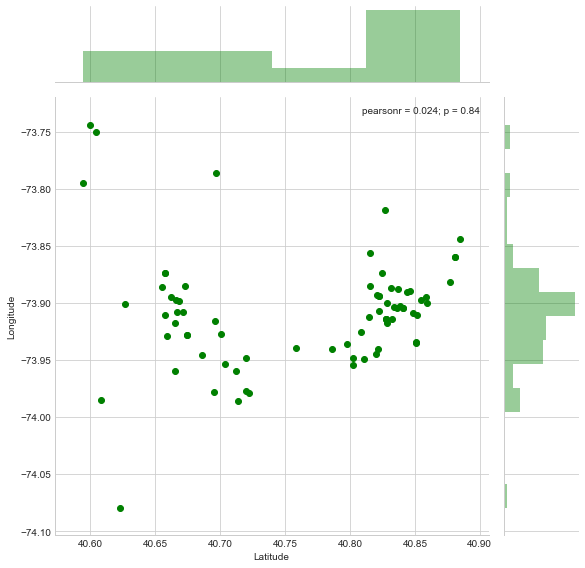

In [15]:
comm = df1[df1['Community School?'] == 'Yes']
sns.jointplot(data=comm, x='Latitude', y='Longitude', size=8, color='g')
# community schools are dispersed evenly across the city
#sns.lmplot(x='Latitude', y='Longitude', hue='Community School?', data=df1, fit_reg=False, palette='Set1')


In [16]:
df1.head(2)

School Name      SED Code Location Code  District   Latitude  \
0  P.S. 015 ROBERTO CLEMENTE  310100010015        01M015         1  40.721834   
1        P.S. 019 ASHER LEVY  310100010019        01M019         1  40.729892   

   Longitude                   Address (Full)      City    Zip  \
0 -73.978766  333 E 4TH ST NEW YORK, NY 10009  NEW YORK  10009   
1 -73.984231   185 1ST AVE NEW YORK, NY 10003  NEW YORK  10003   

                 Grades Grade Low Grade High Community School?  \
0  PK,0K,01,02,03,04,05        PK         05               Yes   
1  PK,0K,01,02,03,04,05        PK         05                No   

   Economic Need Index School Income Estimate Percent ELL Percent Asian  \
0                0.919            $31,141.72           9%            5%   
1                0.641            $56,462.88           5%           10%   

  Percent Black Percent Hispanic Percent Black / Hispanic Percent White  \
0           32%              60%                      92%            1%   
1           20%              63%                      83%            6%   

  Student Attendance Rate Percent of Students Chronically Absent  \
0                     94%                                    18%   
1                     92%                                    30%   

  Rigorous Instruction % Rigorous Instruction Rating Collaborative Teachers %  \
0                    89%              Meeting Target                      94%   
1                    96%                         NaN                      96%   

  Collaborative Teachers Rating Supportive Environment %  \
0                Meeting Target                      86%   
1                           NaN                      97%   

  Supportive Environment Rating Effective School Leadership %  \
0              Exceeding Target                           91%   
1                           NaN                           90%   

  Effective School Leadership Rating Strong Family-Community Ties %  \
0                   Exceeding Target                            85%   
1                   Exceeding Target                            86%   

  Strong Family-Community Ties Rating Trust %      Trust Rating  \
0                      Meeting Target     94%  Exceeding Target   
1                      Meeting Target     94%    Meeting Target   

  Student Achievement Rating  Average ELA Proficiency  \
0         Approaching Target                     2.14   
1           Exceeding Target                     2.63   

   Average Math Proficiency  Grade 3 ELA - All Students Tested  \
0                      2.17                                 20   
1                      2.98                                 33   

   Grade 3 ELA 4s - All Students  \
0                              0   
1                              2   

   Grade 3 ELA 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   

   Grade 3 ELA 4s - Black or African American  \
0                                           0   
1                                           1   

   Grade 3 ELA 4s - Hispanic or Latino  \
0                                    0   
1                                    1   

   Grade 3 ELA 4s - Asian or Pacific Islander  Grade 3 ELA 4s - White  \
0                                           0                       0   
1                                           0                       0   

   Grade 3 ELA 4s - Multiracial  Grade 3 ELA 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   

   Grade 3 ELA 4s - Economically Disadvantaged  \
0                                            0   
1                                            0   

   Grade 3 Math - All Students tested  Grade 3 Math 4s - All Students  \
0                                  21                               0   

### Data Processing

- Grab columns that have percentages and convert the columns to numerical values.
- Check if there are any null values.

In [17]:
percent_col = []
for col in df1.columns:
    if '%' in col or 'Percent' in col or 'Rate' in col:
        percent_col.append(col)
        print(col)


Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Student Attendance Rate
Percent of Students Chronically Absent
Rigorous Instruction %
Collaborative Teachers %
Supportive Environment %
Effective School Leadership %
Strong Family-Community Ties %
Trust %


In [18]:
df1[percent_col].isnull().sum()


Percent ELL                                0
Percent Asian                              0
Percent Black                              0
Percent Hispanic                           0
Percent Black / Hispanic                   0
Percent White                              0
Student Attendance Rate                   25
Percent of Students Chronically Absent    25
Rigorous Instruction %                    25
Collaborative Teachers %                  25
Supportive Environment %                  25
Effective School Leadership %             25
Strong Family-Community Ties %            25
Trust %                                   25
dtype: int64

**Convert the first 6 columns into decimals instead of percentages.**

In [19]:
for col in percent_col[0:6]:
    df1[col] = df1[col].apply(lambda p: float(p.strip('%'))/100)
    

In [20]:
df1[percent_col].head(2)

Percent ELL  Percent Asian  Percent Black  Percent Hispanic  \
0         0.09           0.05           0.32              0.60   
1         0.05           0.10           0.20              0.63   

   Percent Black / Hispanic  Percent White Student Attendance Rate  \
0                      0.92           0.01                     94%   
1                      0.83           0.06                     92%   

  Percent of Students Chronically Absent Rigorous Instruction %  \
0                                    18%                    89%   
1                                    30%                    96%   

  Collaborative Teachers % Supportive Environment %  \
0                      94%                      86%   
1                      96%                      97%   

  Effective School Leadership % Strong Family-Community Ties % Trust %  
0                           91%                            85%     94%  
1                           90%                            86%     94%

In [21]:
df1[percent_col].describe()

Percent ELL  Percent Asian  Percent Black  Percent Hispanic  \
count  1272.000000    1272.000000    1272.000000       1272.000000   
mean      0.124843       0.116478       0.319961          0.411533   
std       0.113631       0.176542       0.288197          0.261535   
min       0.000000       0.000000       0.000000          0.020000   
25%       0.040000       0.010000       0.060000          0.180000   
50%       0.090000       0.040000       0.240000          0.355000   
75%       0.170000       0.140000       0.552500          0.640000   
max       0.990000       0.950000       0.970000          1.000000   

       Percent Black / Hispanic  Percent White  
count               1272.000000    1272.000000  
mean                   0.731439       0.131635  
std                    0.293774       0.200358  
min                    0.030000       0.000000  
25%                    0.490000       0.010000  
50%                    0.900000       0.030000  
75%                    0.960000       0.160000  
max                    1.000000       0.920000

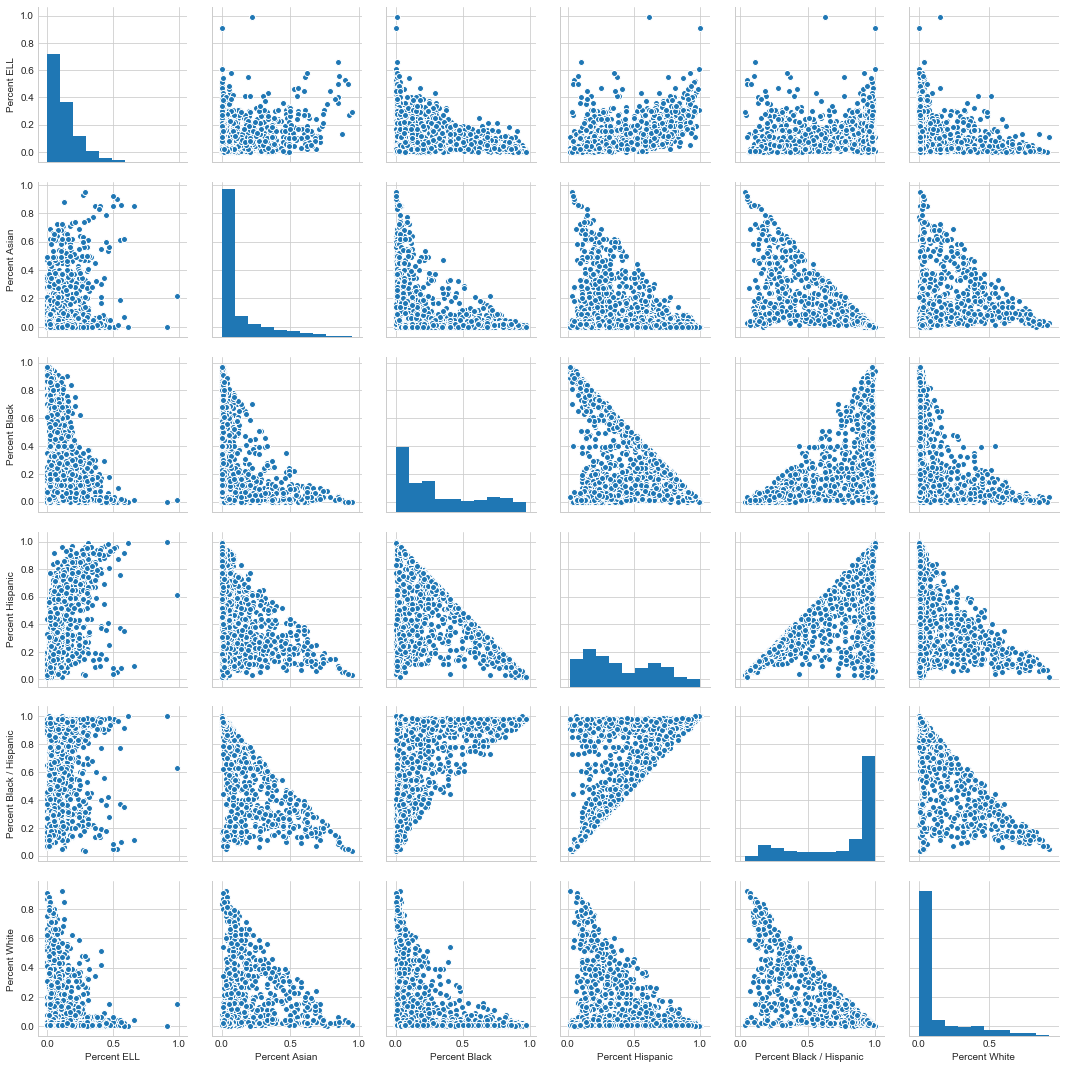

In [22]:
sns.pairplot(df1[percent_col] )

** Based on the pairplot,there seems to be a greater percentage of EEL students in schools with more Asians and Hispanics.**

In [23]:
for col in percent_col[6:]:
    df1[col] = df1[df1[col].notnull()][col].apply(lambda p: float(p.strip('%'))/100)
    

In [24]:
df1[percent_col[6:]].iplot(kind='box')

** Fill the null values with the mean.**

In [25]:
df1[percent_col] = df1[percent_col].fillna(df1.mean())

**National studies have found that strong community schools have:**
- higher graduation rates and lower dropout rates;
- higher student attendance;
- higher reading and math scores;
- improved school climate, including teacher morale and student behavior;
- greater parent engagement;
- lower rates of neighborhood crime and violence.

In [26]:
df1.groupby('Community School?')[percent_col[:6]].mean()

Percent ELL  Percent Asian  Percent Black  \
Community School?                                              
No                    0.121622       0.122232       0.314038   
Yes                   0.175526       0.025921       0.413158   

                   Percent Hispanic  Percent Black / Hispanic  Percent White  
Community School?                                                             
No                         0.404289                  0.718286       0.138462  
Yes                        0.525526                  0.938421       0.024211

In [27]:
df1.groupby('Community School?')[percent_col[:6]].mean().iplot(kind='bar')


In [28]:
df1.groupby('Community School?')[percent_col[6:]].mean().iplot(kind='line' )
#sns.pointplot(data= df1, x='Community School?', y= 'Student Attendance Rate' )


### Community School Analysis 
- There are 76 community schools and 1196 non-community schools. 
- Community schools have an increase percentage of Blacks, Hispanics, and EEL, while there is a decrease in percentage for Whites and Asians.
- Seems that community schools do fair worse than non-communitys schools quality and evironments.
- There is a significant increase in students who are chronically absent in community schools.
    - Community schools are usually based at low income areas with lack of education focused communities. 
        - A better comparrison to make is to compare the bottom 10-25% of schools with community schools to see if community schools do make a difference. 
   


In [29]:
#rating = df1.groupby('Rigorous Instruction Rating').mean().reset_index()


## Lets take a look at schools with respect to education quality

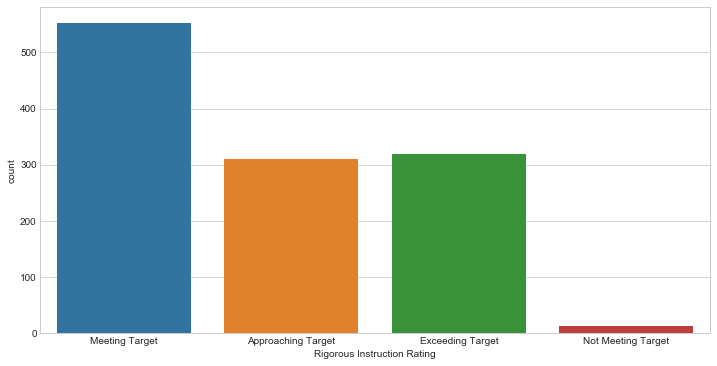

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(df1['Rigorous Instruction Rating'])


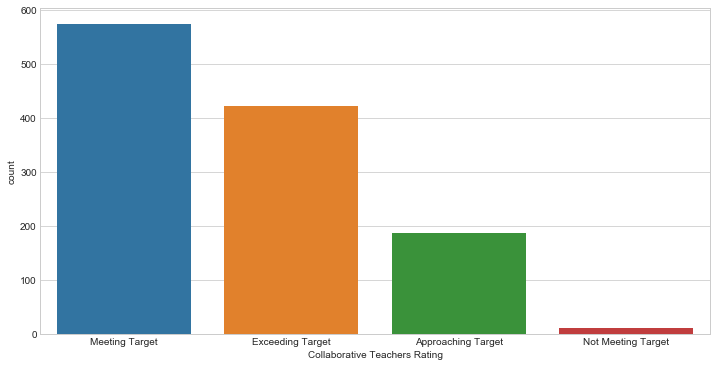

In [31]:

plt.figure(figsize=(12,6))
sns.countplot(df1['Collaborative Teachers Rating'])

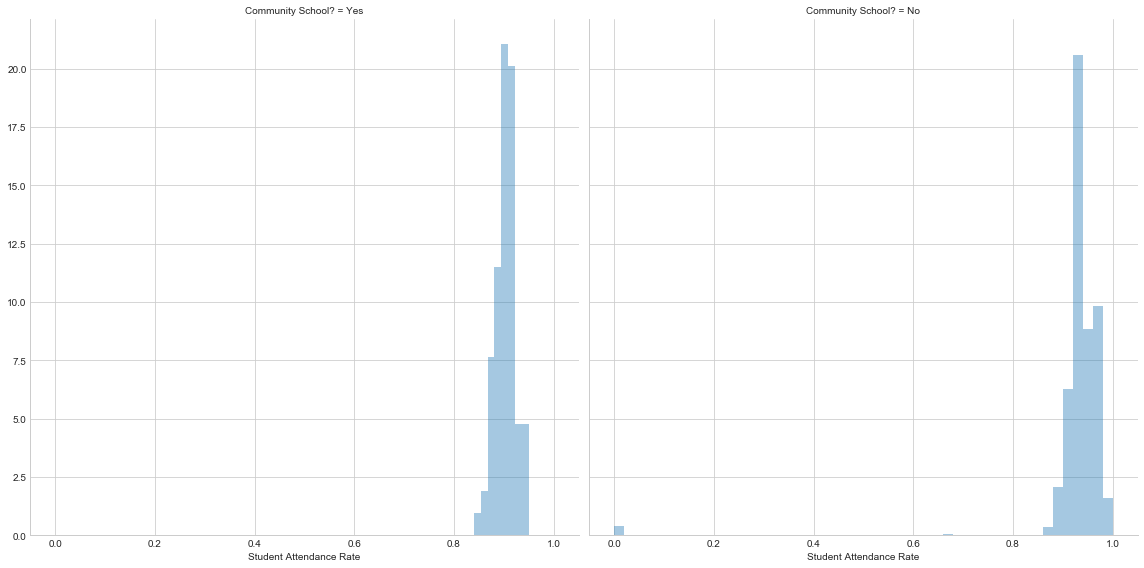

In [32]:
g = sns.FacetGrid(data=df1, col = 'Community School?',size=8)
g.map(sns.distplot, 'Student Attendance Rate',norm_hist=True, kde=False, )



### The Economic Need Index reflects the socioeconomics of the school population. 
**Economic Need Index** =  (Percent Temporary Housing) + (Percent HRA-eligible * 0.5) + (Percent Free Lunch Eligible * 0.5)

- Convert School Income Estimate into a float.
- Create bar graphs of Economic Need Index and School Income Estimate

In [33]:
df1['School Income Estimate'] = df1['School Income Estimate'].str.replace(',', '')
df1['School Income Estimate'] = df1['School Income Estimate'].str.replace('$', '')
df1['School Income Estimate'] = df1['School Income Estimate'].str.replace(' ', '')
df1['School Income Estimate'] = df1['School Income Estimate'].astype(float)

In [34]:
df1.groupby('Rigorous Instruction Rating')['School Income Estimate'].mean().iplot(kind='bar')

In [35]:
plt.figure(figsize=(15,15))
df1.iplot(kind='scatter',x='Longitude',y='Latitude',mode='markers',size=10,categories='Rigorous Instruction Rating',
          xTitle='Longitude', yTitle='Latitude', title='Rigorous Instruction Rating')

In [36]:
df1.groupby('Rigorous Instruction Rating')['Economic Need Index'].mean().iplot(kind='bar')

In [37]:
df1[df1['Community School?'] == 'Yes'].groupby('Rigorous Instruction Rating')['Economic Need Index'].mean().iplot(kind='bar')

In [38]:
df1[df1['Community School?'] == 'No'].groupby('Rigorous Instruction Rating')['Economic Need Index'].mean().iplot(kind='bar')

In [39]:
df1['Economic Need Index'].describe()


count    1247.000000
mean        0.672281
std         0.210959
min         0.049000
25%         0.550000
50%         0.731000
75%         0.841000
max         0.957000
Name: Economic Need Index, dtype: float64

In [40]:
df1[df1['Community School?'] == 'Yes']['Economic Need Index'].describe()


count    76.000000
mean      0.853487
std       0.070134
min       0.560000
25%       0.822750
50%       0.869500
75%       0.901000
max       0.943000
Name: Economic Need Index, dtype: float64

In [41]:
df1[df1['Community School?'] == 'No']['Economic Need Index'].describe()


count    1171.000000
mean        0.660520
std         0.211679
min         0.049000
25%         0.539500
50%         0.715000
75%         0.833000
max         0.957000
Name: Economic Need Index, dtype: float64

In [42]:
df1.groupby('Community School?')[['Average Math Proficiency','Average ELA Proficiency']].mean().iplot(kind='bar')


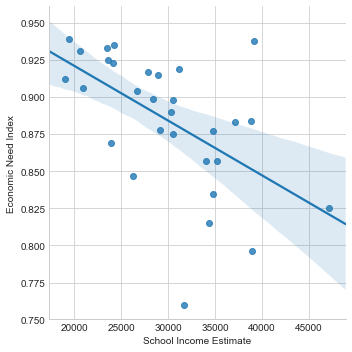

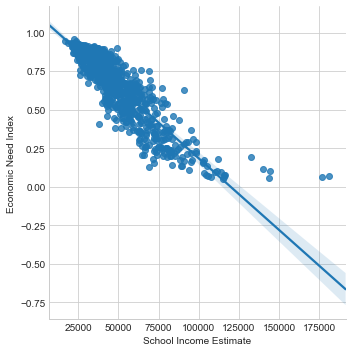

In [43]:
sns.lmplot(x='School Income Estimate', y='Economic Need Index', hue=None, data=df1[df1['Community School?']== 'Yes'], fit_reg=True)
plt.show()
sns.lmplot(x='School Income Estimate', y='Economic Need Index', hue=None, data=df1[df1['Community School?']== 'No'], fit_reg=True)


## Socioeconomic Needs Analysis
- Most schools are exceeding expectations for rigorous instruction and collaboration.
- Most schools that are not meeting rigourous intruction ratings are located in the Bronx (District 10)
- Not meeting target for both cases are in the minority.
- Non-community a higher attendence rate.
- Schools with greater Economic Need Index are often not meeting targets and approaching targets.
    - Community schools follow the same pattern
- Community schools tend to do worse on Math and ELA proficieny exams.
- There is a significant negative correlation between Economic Need Index and School Income Estimate in both community and non-community.

## Let's now take a look at our SHSAT dataset

- Rename columns 
- Check distributions based off year
- Check how number of registered and taken students for SHSAT changes throughout the years.
- Calcualte percent taken of those registered (percent taken/percent registered)


In [44]:
df2.head()

DBN               School name  Year of SHST  Grade level  \
0  05M046    P.S. 046 Arthur Tappan          2013            8   
1  05M046    P.S. 046 Arthur Tappan          2014            8   
2  05M046    P.S. 046 Arthur Tappan          2015            8   
3  05M046    P.S. 046 Arthur Tappan          2016            8   
4  05M123  P.S. 123 Mahalia Jackson          2013            8   

   Enrollment on 10/31  Number of students who registered for the SHSAT  \
0                   91                                               31   
1                   95                                               26   
2                   73                                               21   
3                   56                                               20   
4                   62                                               31   

   Number of students who took the SHSAT  
0                                     14  
1                                      7  
2                                     10  
3                                      8  
4                                     14

In [45]:
df2.rename(columns= {'School name':'School Name'},inplace = True)
df2.rename(columns= {'Number of students who registered for the SHSAT':'Registered','Number of students who took the SHSAT':'Taken', 'Year of SHST':'Year','Percent of Students Chronically Absent':'Chronically Absent'},inplace = True)



In [46]:
df2['School Name'].nunique()

30

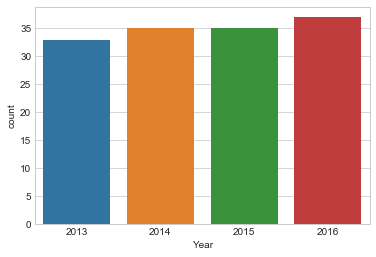

In [47]:
sns.countplot(df2['Year'])

In [48]:
df2.groupby('Year')[['Registered','Taken']].sum().iplot(kind='bar')

In [49]:
df2['Percent Taken'] = df2['Taken']/df2['Registered']
df2.groupby('Year')['Percent Taken'].mean().iplot(kind='bar')

## Analysis of SHSAT dataset
- Each year there are more schools with reported number of students registering/taking the SHSAT.
- Number of students registering the SHSAT increased from 2013- 2014 but significanlty decreased the year after.
- However, the number of students who have taken the exam does not vary too much despite the flucuating number of registrations.
- In 2015 and 2016, percent taken of SHSAT increases but that is offset by the decrease of students registering for the exam.

## Combine the two datasets 
- Select which features you want from each dataframe and drop the ones not needed.
- Change Location Code to DBN.
- Merge on School Name and DBN. Make sure each entry in School Name is in uppercase.

In [50]:
df1.head(2)

School Name      SED Code Location Code  District   Latitude  \
0  P.S. 015 ROBERTO CLEMENTE  310100010015        01M015         1  40.721834   
1        P.S. 019 ASHER LEVY  310100010019        01M019         1  40.729892   

   Longitude                   Address (Full)      City    Zip  \
0 -73.978766  333 E 4TH ST NEW YORK, NY 10009  NEW YORK  10009   
1 -73.984231   185 1ST AVE NEW YORK, NY 10003  NEW YORK  10003   

                 Grades Grade Low Grade High Community School?  \
0  PK,0K,01,02,03,04,05        PK         05               Yes   
1  PK,0K,01,02,03,04,05        PK         05                No   

   Economic Need Index  School Income Estimate  Percent ELL  Percent Asian  \
0                0.919                31141.72         0.09           0.05   
1                0.641                56462.88         0.05           0.10   

   Percent Black  Percent Hispanic  Percent Black / Hispanic  Percent White  \
0           0.32              0.60                      0.92           0.01   
1           0.20              0.63                      0.83           0.06   

   Student Attendance Rate  Percent of Students Chronically Absent  \
0                     0.94                                    0.18   
1                     0.92                                    0.30   

   Rigorous Instruction % Rigorous Instruction Rating  \
0                    0.89              Meeting Target   
1                    0.96                         NaN   

   Collaborative Teachers % Collaborative Teachers Rating  \
0                      0.94                Meeting Target   
1                      0.96                           NaN   

   Supportive Environment % Supportive Environment Rating  \
0                      0.86              Exceeding Target   
1                      0.97                           NaN   

   Effective School Leadership % Effective School Leadership Rating  \
0                           0.91                   Exceeding Target   
1                           0.90                   Exceeding Target   

   Strong Family-Community Ties % Strong Family-Community Ties Rating  \
0                            0.85                      Meeting Target   
1                            0.86                      Meeting Target   

   Trust %      Trust Rating Student Achievement Rating  \
0     0.94  Exceeding Target         Approaching Target   
1     0.94    Meeting Target           Exceeding Target   

   Average ELA Proficiency  Average Math Proficiency  \
0                     2.14                      2.17   
1                     2.63                      2.98   

   Grade 3 ELA - All Students Tested  Grade 3 ELA 4s - All Students  \
0                                 20                              0   
1                                 33                              2   

   Grade 3 ELA 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   

   Grade 3 ELA 4s - Black or African American  \
0                                           0   
1                                           1   

   Grade 3 ELA 4s - Hispanic or Latino  \
0                                    0   
1                                    1   

   Grade 3 ELA 4s - Asian or Pacific Islander  Grade 3 ELA 4s - White  \
0                                           0                       0   
1                                           0                       0   

   Grade 3 ELA 4s - Multiracial  Grade 3 ELA 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   

   Grade 3 ELA 4s - Economically Disadvantaged  \
0                                            0   
1                                            0   

   Grade 3 Math - All Students tested  Grade 3 Math 4s - All Students  \
0                          

In [51]:
df1.drop(columns = ['SED Code', 'Address (Full)', 'Zip', 'Grades','Grade High', 'Grade Low'],inplace=True)

In [52]:
df2.head(2)

DBN             School Name  Year  Grade level  Enrollment on 10/31  \
0  05M046  P.S. 046 Arthur Tappan  2013            8                   91   
1  05M046  P.S. 046 Arthur Tappan  2014            8                   95   

   Registered  Taken  Percent Taken  
0          31     14       0.451613  
1          26      7       0.269231

In [53]:
df2.rename(columns= {'School name':'School Name'},inplace = True)
df2.tail()

DBN                            School Name  Year  Grade level  \
135  84M709  Harlem Village Academy Charter School  2016            9   
136  84M726  KIPP STAR College Prep Charter School  2013            8   
137  84M726  KIPP STAR College Prep Charter School  2014            8   
138  84M726  KIPP STAR College Prep Charter School  2015            8   
139  84M726  KIPP STAR College Prep Charter School  2016            8   

     Enrollment on 10/31  Registered  Taken  Percent Taken  
135                   42           1      1       1.000000  
136                   75          74     29       0.391892  
137                   71          74     19       0.256757  
138                   84          84     29       0.345238  
139                   62          60     19       0.316667

In [54]:
df1.rename(columns= {'Location Code':'DBN'},inplace = True)
df2['School Name'] = df2['School Name'].apply(lambda x: x.upper())
df1.head(2)

School Name     DBN  District   Latitude  Longitude  \
0  P.S. 015 ROBERTO CLEMENTE  01M015         1  40.721834 -73.978766   
1        P.S. 019 ASHER LEVY  01M019         1  40.729892 -73.984231   

       City Community School?  Economic Need Index  School Income Estimate  \
0  NEW YORK               Yes                0.919                31141.72   
1  NEW YORK                No                0.641                56462.88   

   Percent ELL  Percent Asian  Percent Black  Percent Hispanic  \
0         0.09           0.05           0.32              0.60   
1         0.05           0.10           0.20              0.63   

   Percent Black / Hispanic  Percent White  Student Attendance Rate  \
0                      0.92           0.01                     0.94   
1                      0.83           0.06                     0.92   

   Percent of Students Chronically Absent  Rigorous Instruction %  \
0                                    0.18                    0.89   
1                                    0.30                    0.96   

  Rigorous Instruction Rating  Collaborative Teachers %  \
0              Meeting Target                      0.94   
1                         NaN                      0.96   

  Collaborative Teachers Rating  Supportive Environment %  \
0                Meeting Target                      0.86   
1                           NaN                      0.97   

  Supportive Environment Rating  Effective School Leadership %  \
0              Exceeding Target                           0.91   
1                           NaN                           0.90   

  Effective School Leadership Rating  Strong Family-Community Ties %  \
0                   Exceeding Target                            0.85   
1                   Exceeding Target                            0.86   

  Strong Family-Community Ties Rating  Trust %      Trust Rating  \
0                      Meeting Target     0.94  Exceeding Target   
1                      Meeting Target     0.94    Meeting Target   

  Student Achievement Rating  Average ELA Proficiency  \
0         Approaching Target                     2.14   
1           Exceeding Target                     2.63   

   Average Math Proficiency  Grade 3 ELA - All Students Tested  \
0                      2.17                                 20   
1                      2.98                                 33   

   Grade 3 ELA 4s - All Students  \
0                              0   
1                              2   

   Grade 3 ELA 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   

   Grade 3 ELA 4s - Black or African American  \
0                                           0   
1                                           1   

   Grade 3 ELA 4s - Hispanic or Latino  \
0                                    0   
1                                    1   

   Grade 3 ELA 4s - Asian or Pacific Islander  Grade 3 ELA 4s - White  \
0                                           0                       0   
1                                           0                       0   

   Grade 3 ELA 4s - Multiracial  Grade 3 ELA 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   

   Grade 3 ELA 4s - Economically Disadvantaged  \
0                                            0   
1                                            0   

   Grade 3 Math - All Students tested  Grade 3 Math 4s - All Students  \
0                                  21                               0   
1                                  33                               6   

   Grade 3 Math 4s - American Indian or Alaska Native  \
0                                                  0    
1                                                  0    

   Grade 3 Math 4s - Black or Afr

In [55]:
merged = pd.merge(df1,df2, on = ['School Name','DBN'], how='inner')
merged['Absent Rate'] = merged['Student Attendance Rate'].apply(lambda x: 1-x)
merged.shape

(110, 160)

## EDA of merged dataframe

In [56]:
merged.rename(columns= {'Number of students who registered for the SHSAT':'Registered','Number of students who took the SHSAT':'Taken', 'Year of SHST':'Year','Percent of Students Chronically Absent':'Chronically Absent'},inplace = True)
merged.head(2)

School Name     DBN  District   Latitude  Longitude      City  \
0  P.S. 046 ARTHUR TAPPAN  05M046         5  40.831496 -73.936154  NEW YORK   
1  P.S. 046 ARTHUR TAPPAN  05M046         5  40.831496 -73.936154  NEW YORK   

  Community School?  Economic Need Index  School Income Estimate  Percent ELL  \
0                No                0.903                23035.78         0.09   
1                No                0.903                23035.78         0.09   

   Percent Asian  Percent Black  Percent Hispanic  Percent Black / Hispanic  \
0           0.01            0.5              0.48                      0.97   
1           0.01            0.5              0.48                      0.97   

   Percent White  Student Attendance Rate  Chronically Absent  \
0           0.01                      0.9                0.39   
1           0.01                      0.9                0.39   

   Rigorous Instruction % Rigorous Instruction Rating  \
0                    0.91              Meeting Target   
1                    0.91              Meeting Target   

   Collaborative Teachers % Collaborative Teachers Rating  \
0                      0.89                Meeting Target   
1                      0.89                Meeting Target   

   Supportive Environment % Supportive Environment Rating  \
0                      0.85                Meeting Target   
1                      0.85                Meeting Target   

   Effective School Leadership % Effective School Leadership Rating  \
0                           0.81                     Meeting Target   
1                           0.81                     Meeting Target   

   Strong Family-Community Ties % Strong Family-Community Ties Rating  \
0                             0.8                  Approaching Target   
1                             0.8                  Approaching Target   

   Trust %    Trust Rating Student Achievement Rating  \
0      0.9  Meeting Target         Approaching Target   
1      0.9  Meeting Target         Approaching Target   

   Average ELA Proficiency  Average Math Proficiency  \
0                     2.19                      2.19   
1                     2.19                      2.19   

   Grade 3 ELA - All Students Tested  Grade 3 ELA 4s - All Students  \
0                                 78                              2   
1                                 78                              2   

   Grade 3 ELA 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   

   Grade 3 ELA 4s - Black or African American  \
0                                           1   
1                                           1   

   Grade 3 ELA 4s - Hispanic or Latino  \
0                                    0   
1                                    0   

   Grade 3 ELA 4s - Asian or Pacific Islander  Grade 3 ELA 4s - White  \
0                                           0                       0   
1                                           0                       0   

   Grade 3 ELA 4s - Multiracial  Grade 3 ELA 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   

   Grade 3 ELA 4s - Economically Disadvantaged  \
0                                            2   
1                                            2   

   Grade 3 Math - All Students tested  Grade 3 Math 4s - All Students  \
0                                  79                               3   
1                                  79                               3   

   Grade 3 Math 4s - American Indian or Alaska Native  \
0                                                  0    
1                                                  0    

   Grade 3 Math 4s - Black or African American  \
0                                            1   
1                    

In [57]:
merged['School Name'].value_counts()

DEMOCRACY PREP HARLEM CHARTER SCHOOL                        8
HARLEM CHILDREN'S ZONE PROMISE ACADEMY II CHARTER SCHOOL    8
THURGOOD MARSHALL ACADEMY FOR LEARNING AND SOCIAL CHANGE    8
COLUMBIA SECONDARY SCHOOL                                   8
DEMOCRACY PREP CHARTER SCHOOL                               8
FREDERICK DOUGLASS ACADEMY                                  8
HARLEM VILLAGE ACADEMY CHARTER SCHOOL                       7
HARLEM CHILDREN'S ZONE PROMISE ACADEMY 1 CHARTER SCHOOL     7
KIPP INFINITY CHARTER SCHOOL                                6
DEMOCRACY PREP ENDURANCE CHARTER SCHOOL                     5
KAPPA IV                                                    4
P.S. 129 JOHN H. FINLEY                                     4
P.S. 161 PEDRO ALBIZU CAMPOS                                4
NEW DESIGN MIDDLE SCHOOL                                    4
P.S. 046 ARTHUR TAPPAN                                      4
ST. HOPE LEADERSHIP ACADEMY CHARTER SCHOOL                  4
P.S. 123

In [58]:
merged['Year'].value_counts()

2016    32
2015    28
2014    26
2013    24
Name: Year, dtype: int64

In [59]:
merged['Grade level'].unique()

array([8, 9])

In [60]:
merge_by_year = (merged
                .groupby(['Year','Community School?','Grade level' ])
                ['Registered','Taken','Absent Rate','Chronically Absent','Economic Need Index']
                .agg(['mean'])
                )
merge_by_year

Registered      Taken Absent Rate  \
                                         mean       mean        mean   
Year Community School? Grade level                                     
2013 No                8            34.500000  16.062500    0.061250   
                       9             2.571429   1.285714    0.047143   
     Yes               8            31.000000  14.000000    0.120000   
2014 No                8            42.058824  17.411765    0.061176   
                       9             2.250000   1.500000    0.047500   
     Yes               8            25.000000  13.000000    0.120000   
2015 No                8            28.222222  16.888889    0.064444   
                       9             1.555556   1.444444    0.048889   
     Yes               8            12.000000   5.000000    0.120000   
2016 No                8            26.300000  15.950000    0.114500   
                       9             2.090909   1.636364    0.054545   
     Yes               8            16.000000   5.000000    0.120000   

                                   Chronically Absent Economic Need Index  
                                                 mean                mean  
Year Community School? Grade level                                         
2013 No                8                     0.186250            0.772938  
                       9                     0.122857            0.708857  
     Yes               8                     0.490000            0.835000  
2014 No                8                     0.186471            0.771882  
                       9                     0.122500            0.705000  
     Yes               8                     0.490000            0.835000  
2015 No                8                     0.202222            0.770500  
                       9                     0.130000            0.710556  
     Yes               8                     0.490000            0.835000  
2016 No                8                     0.253000            0.771000  
                       9                     0.160000            0.721818  
     Yes               8                     0.490000            0.835000

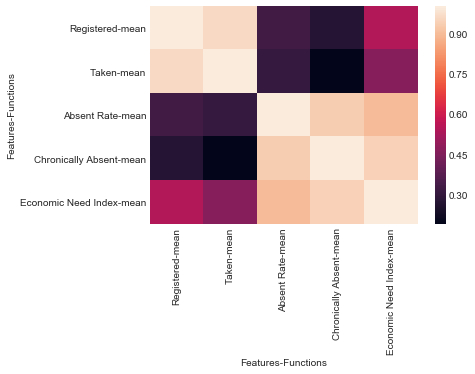

In [61]:
#merge_by_year['Taken'].xs(key='Year', level = )
merge_by_year.columns.names = [ 'Features', 'Functions']
#merge_by_year.xs(key='sum', axis=1, level='Functions')
sns.heatmap(merge_by_year.corr())

In [62]:
merged.head(2)

School Name     DBN  District   Latitude  Longitude      City  \
0  P.S. 046 ARTHUR TAPPAN  05M046         5  40.831496 -73.936154  NEW YORK   
1  P.S. 046 ARTHUR TAPPAN  05M046         5  40.831496 -73.936154  NEW YORK   

  Community School?  Economic Need Index  School Income Estimate  Percent ELL  \
0                No                0.903                23035.78         0.09   
1                No                0.903                23035.78         0.09   

   Percent Asian  Percent Black  Percent Hispanic  Percent Black / Hispanic  \
0           0.01            0.5              0.48                      0.97   
1           0.01            0.5              0.48                      0.97   

   Percent White  Student Attendance Rate  Chronically Absent  \
0           0.01                      0.9                0.39   
1           0.01                      0.9                0.39   

   Rigorous Instruction % Rigorous Instruction Rating  \
0                    0.91              Meeting Target   
1                    0.91              Meeting Target   

   Collaborative Teachers % Collaborative Teachers Rating  \
0                      0.89                Meeting Target   
1                      0.89                Meeting Target   

   Supportive Environment % Supportive Environment Rating  \
0                      0.85                Meeting Target   
1                      0.85                Meeting Target   

   Effective School Leadership % Effective School Leadership Rating  \
0                           0.81                     Meeting Target   
1                           0.81                     Meeting Target   

   Strong Family-Community Ties % Strong Family-Community Ties Rating  \
0                             0.8                  Approaching Target   
1                             0.8                  Approaching Target   

   Trust %    Trust Rating Student Achievement Rating  \
0      0.9  Meeting Target         Approaching Target   
1      0.9  Meeting Target         Approaching Target   

   Average ELA Proficiency  Average Math Proficiency  \
0                     2.19                      2.19   
1                     2.19                      2.19   

   Grade 3 ELA - All Students Tested  Grade 3 ELA 4s - All Students  \
0                                 78                              2   
1                                 78                              2   

   Grade 3 ELA 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   

   Grade 3 ELA 4s - Black or African American  \
0                                           1   
1                                           1   

   Grade 3 ELA 4s - Hispanic or Latino  \
0                                    0   
1                                    0   

   Grade 3 ELA 4s - Asian or Pacific Islander  Grade 3 ELA 4s - White  \
0                                           0                       0   
1                                           0                       0   

   Grade 3 ELA 4s - Multiracial  Grade 3 ELA 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   

   Grade 3 ELA 4s - Economically Disadvantaged  \
0                                            2   
1                                            2   

   Grade 3 Math - All Students tested  Grade 3 Math 4s - All Students  \
0                                  79                               3   
1                                  79                               3   

   Grade 3 Math 4s - American Indian or Alaska Native  \
0                                                  0    
1                                                  0    

   Grade 3 Math 4s - Black or African American  \
0                                            1   
1                    

In [63]:
ELA_grade = []
Math_grade = []


for col in merged.columns:
    if 'ELA 4s - All Students' in col:
        ELA_grade.append(col)
    elif 'Math 4s - All Students' in col:
        Math_grade.append(col)
#for col in merged.columns:
    


In [64]:
merged.groupby('Year')[Math_grade].sum().iplot(kind='line')
merged.groupby('Year')[ELA_grade].sum().iplot(kind='line')

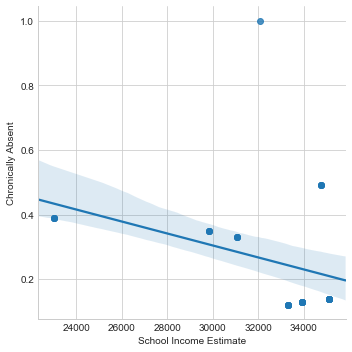

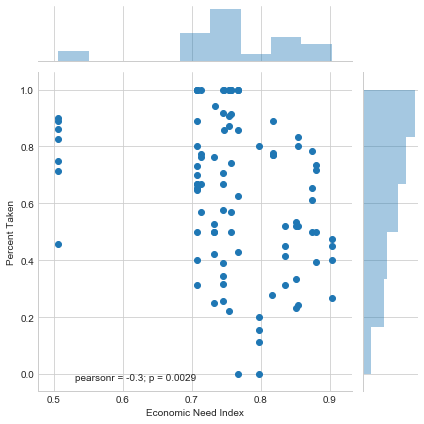

In [65]:
#sns.jointplot(data=merged, x = 'School Income Estimate', y='Percent Taken' )
sns.lmplot(x='School Income Estimate', y='Chronically Absent', hue=None, data=merged, fit_reg=True)

plt.show()
sns.jointplot(data=merged, x = 'Economic Need Index', y='Percent Taken' )


In [66]:
merged.head()

School Name     DBN  District   Latitude  Longitude      City  \
0    P.S. 046 ARTHUR TAPPAN  05M046         5  40.831496 -73.936154  NEW YORK   
1    P.S. 046 ARTHUR TAPPAN  05M046         5  40.831496 -73.936154  NEW YORK   
2    P.S. 046 ARTHUR TAPPAN  05M046         5  40.831496 -73.936154  NEW YORK   
3    P.S. 046 ARTHUR TAPPAN  05M046         5  40.831496 -73.936154  NEW YORK   
4  P.S. 123 MAHALIA JACKSON  05M123         5  40.820192 -73.944457  NEW YORK   

  Community School?  Economic Need Index  School Income Estimate  Percent ELL  \
0                No                0.903                23035.78         0.09   
1                No                0.903                23035.78         0.09   
2                No                0.903                23035.78         0.09   
3                No                0.903                23035.78         0.09   
4               Yes                0.835                34752.53         0.17   

   Percent Asian  Percent Black  Percent Hispanic  Percent Black / Hispanic  \
0           0.01           0.50              0.48                      0.97   
1           0.01           0.50              0.48                      0.97   
2           0.01           0.50              0.48                      0.97   
3           0.01           0.50              0.48                      0.97   
4           0.02           0.52              0.41                      0.93   

   Percent White  Student Attendance Rate  Chronically Absent  \
0           0.01                     0.90                0.39   
1           0.01                     0.90                0.39   
2           0.01                     0.90                0.39   
3           0.01                     0.90                0.39   
4           0.04                     0.88                0.49   

   Rigorous Instruction % Rigorous Instruction Rating  \
0                    0.91              Meeting Target   
1                    0.91              Meeting Target   
2                    0.91              Meeting Target   
3                    0.91              Meeting Target   
4                    0.83          Approaching Target   

   Collaborative Teachers % Collaborative Teachers Rating  \
0                      0.89                Meeting Target   
1                      0.89                Meeting Target   
2                      0.89                Meeting Target   
3                      0.89                Meeting Target   
4                      0.72            Approaching Target   

   Supportive Environment % Supportive Environment Rating  \
0                      0.85                Meeting Target   
1                      0.85                Meeting Target   
2                      0.85                Meeting Target   
3                      0.85                Meeting Target   
4                      0.84            Approaching Target   

   Effective School Leadership % Effective School Leadership Rating  \
0                           0.81                     Meeting Target   
1                           0.81                     Meeting Target   
2                           0.81                     Meeting Target   
3                           0.81                     Meeting Target   
4                           0.65                 Not Meeting Target   

   Strong Family-Community Ties % Strong Family-Community Ties Rating  \
0                            0.80                  Approaching Target   
1                            0.80                  Approaching Target   
2                            0.80                  Approaching Target   
3                            0.80                  Approaching Target   
4                            0.82                  Approaching Target   

   Trust %        Trust Rating Student Achievement Rating  \
0     0.90      Meeting Target         Approaching Target   
1     0.90      Meeting Target         Approaching Target   
2     0.90      Meeting Target         Approaching

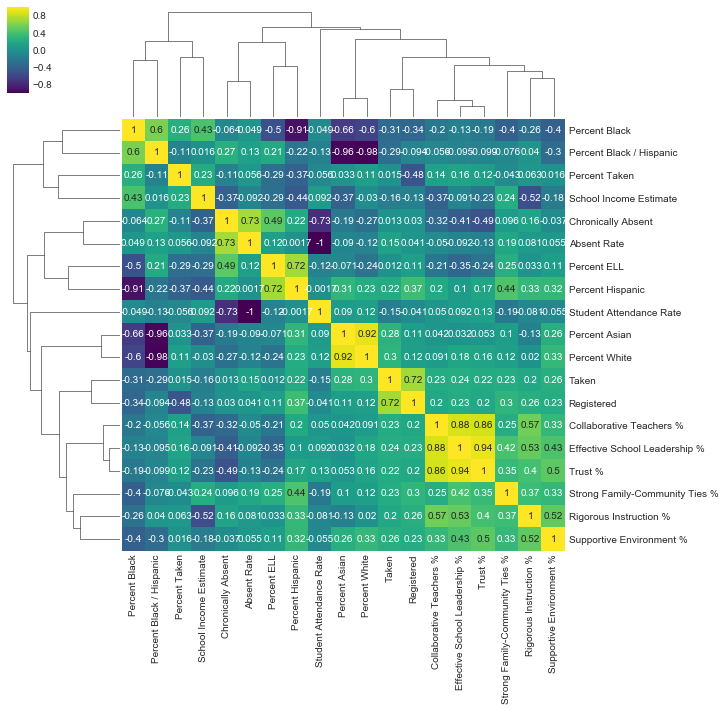

In [67]:
percent = ['Student Attendance Rate',
 'Chronically Absent',
 'Rigorous Instruction %',
 'Collaborative Teachers %',
 'Supportive Environment %',
 'Effective School Leadership %',
 'Strong Family-Community Ties %',
 'Trust %', 'Taken', 'Registered', 
 'Percent Taken', 'Absent Rate',
 'School Income Estimate',
 'Percent ELL','Percent Asian',
 'Percent Black','Percent Hispanic',
 'Percent Black / Hispanic','Percent White']
plt.figure(figsize=(12,8))
sns.clustermap(merged[percent].corr(),cmap='viridis',annot=True)